Este documento é a segunda parte de uma análise de dados sobre a Pesquisa Nacional por Amostra de Domicílios - PNAD COVID19, acerca dos dados coletados pelo IBGE no ano de 2020 para compreender a situação das famílias em relação à pandemia do Sars-cov19

Os dados foram previamente tratados e agora é necessário realizar as análises tendo em vista o escopo do estudo

# Escopo de trabalho

Agora, conhecendo melhor os dados e tendo uma base única, é necessário entender quais perguntas orientam essa análise para compreender melhor como trabalhar com os dados de forma a responder essas perguntas

Diante disso, o objetivo dessa análise será compreender, através dos dados da PNAD - COVID a situação socio-econômica das famílias que foram de alguma forma afetadas pelo coronavírus. 

Mais especificamente, esse objetivo será atingido analisando:
1. Quantas famílias foram acometidas por pelo menos 2 (dois) sintomas do Coronavírus, que serão doravante denominadas famílias sintomáticas;
1. Quantas dessas famílias sintomáticas por dois ou mais sintomas possuem plano de saúde;
1. Quantas das famílias sintomáticas fizeram o teste de COVID;
1. Quantas das famílias sintomáticas que fizeram o teste de COVID testaram positivo;
1. Qual a distribuição geográfica das famílias sintomáticas;
1. Qual foi o comportamento do número de famílias no tempo escolhido;
1. Quais são as condições de trabalho das famílias sintomáticas na região mais afetadas com casos confirmados e suspeitos;
1. Qual o rendimento médio das famílias em geral e das famílias afetadas sintomáticas;
1. Qual a situação das famílias sintomáticas em relação à empréstimos;




# Analisando dados

## Importando bibliotecas

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importando dados

In [23]:
dados = pd.read_csv('/content/dados_pnad_tratados.csv', sep=';')

In [24]:
dados.head()

,UF,mes,urbano_rural,possui_plano_saude,fez_teste_covid,resultado_exame_swab,resultado_furo,resultado_sangue,trabalhou_na_ultima_semana,asfastado_na_ultima_semana,continuou_remunerado,mais_de_1_trabalho,faixa_salarial,salario_familiar,possui_emprestimo,qtd_sintomas
0,11,9,1,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,4.0,NaN,3.0,0.0
1,11,9,1,2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,4.0,NaN,3.0,0.0
2,11,9,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0
3,11,9,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0
4,11,9,1,2,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1045.0,3.0,0.0


Verificando a quantidades de registros por UF

In [25]:
dados.UF.value_counts()

31    93934
35    65917
21    61200
33    58340
29    51310
26    50811
23    50536
42    47558
43    44515
41    40112
15    35764
27    34450
32    31648
13    31355
25    29687
52    27782
22    25137
28    24216
24    23552
51    22797
12    18834
50    17777
14    16674
11    16622
17    15446
53    13111
16     7677
Name: UF, dtype: int64

Criando descrição nomimal de cada UF

In [26]:
mapeia_uf = {
11	: "Rondônia",
12	: "Acre",
13	: "Amazonas",
14	: "Roraima",
15	: "Pará",
16	: "Amapá",
17	: "Tocantins",
21	: "Maranhão",
22	: "Piauí",
23	: "Ceará",
24	: "Rio Grande do Norte",
25	: "Paraíba",
26	: "Pernambuco",
27	: "Alagoas",
28	: "Sergipe",
29	: "Bahia",
31	: "Minas Gerais",
32	: "Espírito Santo",
33	: "Rio de Janeiro",
35	: "São Paulo",
41	: "Paraná",
42	: "Santa Catarina",
43	: "Rio Grande do Sul",
50	: "Mato Grosso do Sul",
51	: "Mato Grosso",
52	: "Goiás",
53	: "Distrito Federal",
}

In [27]:
dados['estado'] = dados.UF.map(mapeia_uf)

Identificando registros com mais de um sintoma, que serão denominados sintomaticos

In [28]:
familias_sintomaticas = dados[dados.qtd_sintomas >1]

In [29]:
familias_sintomaticas.head()

,UF,mes,urbano_rural,possui_plano_saude,fez_teste_covid,resultado_exame_swab,resultado_furo,resultado_sangue,trabalhou_na_ultima_semana,asfastado_na_ultima_semana,continuou_remunerado,mais_de_1_trabalho,faixa_salarial,salario_familiar,possui_emprestimo,qtd_sintomas,estado
25,11,9,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,11.0,Rondônia
61,11,9,1,2,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0,Rondônia
167,11,9,1,1,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,3.0,6.0,Rondônia
215,11,9,1,1,1.0,1.0,NaN,NaN,1.0,NaN,NaN,2.0,4.0,NaN,3.0,10.0,Rondônia
216,11,9,1,2,1.0,1.0,NaN,NaN,1.0,NaN,NaN,2.0,4.0,NaN,3.0,10.0,Rondônia


In [30]:
sintomaticas = dados.qtd_sintomas >1

Verificando quantidade de familias sintomáticas

In [31]:
count_sintomaticas = sintomaticas.value_counts(normalize=True)*100
count_sintomaticas

False    97.7936
True      2.2064
Name: qtd_sintomas, dtype: float64

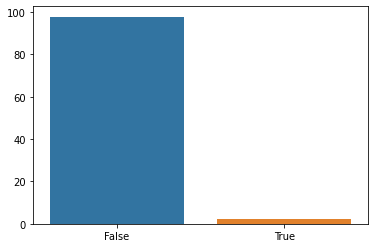

In [32]:
sns.barplot(x=count_sintomaticas.index,  y=count_sintomaticas.values)

Verificando a porcentagem de pessoas que possuem plano de saude

In [33]:
possui_plano_de_saude = dados.possui_plano_saude == 1
possui_plano_de_saude.value_counts(normalize=True)*100

False    78.922658
True     21.077342
Name: possui_plano_saude, dtype: float64

Verificando a pocentagem de famílias sintomáticas que possuem plano de saúde

In [34]:
sintomatico_possui_plano_de_saude = familias_sintomaticas.possui_plano_saude == 1
sintomatico_possui_plano_de_saude.value_counts(normalize=True)*100

False    77.707248
True     22.292752
Name: possui_plano_saude, dtype: float64

Verificando a quantidade de pessoas sintomáticas que realizaram o teste de covid

In [35]:
sintomatico_fez_teste = familias_sintomaticas.fez_teste_covid == 1
sintomatico_fez_teste.value_counts(normalize=True)*100

False    85.897679
True     14.102321
Name: fez_teste_covid, dtype: float64

Quantidade de famílias sintomáticas que positivaram para Covid-19 

In [36]:
sintomatico_positivo = (familias_sintomaticas.resultado_exame_swab == 1) | (familias_sintomaticas.resultado_furo ==1 )| (familias_sintomaticas.resultado_sangue ==1)

In [37]:
sintomatico_positivo.value_counts(normalize=True)*100

False    88.275699
True     11.724301
dtype: float64

In [38]:
familias_sintomaticas_por_estado = ((familias_sintomaticas.groupby('estado').count().qtd_sintomas)/familias_sintomaticas.shape[0])*100
count_estados_mais_sintomaticos = familias_sintomaticas_por_estado.sort_values(ascending=True).tail(7)
count_estados_menos_sintomaticos = familias_sintomaticas_por_estado.sort_values(ascending=True).head(7)
familias_sintomaticas_por_estado.sort_values(ascending=True)

estado
Amapá                   1.222170
Distrito Federal        1.553766
Acre                    1.615348
Tocantins               1.691142
Roraima                 1.790621
Mato Grosso do Sul      1.823780
Rondônia                1.833254
Piauí                   2.415917
Alagoas                 2.501184
Mato Grosso             2.558029
Sergipe                 2.581715
Rio Grande do Norte     2.638560
Espírito Santo          2.723828
Paraíba                 3.396495
Amazonas                3.775462
Paraná                  3.832307
Rio de Janeiro          3.955471
Santa Catarina          4.064424
Goiás                   4.069162
Pernambuco              4.400758
Ceará                   4.528659
Pará                    4.827096
Bahia                   5.774514
São Paulo               6.243486
Rio Grande do Sul       6.395073
Maranhão                7.048792
Minas Gerais           10.738986
Name: qtd_sintomas, dtype: float64

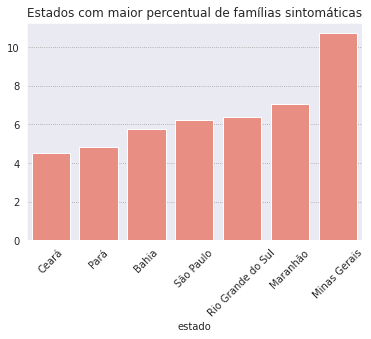

In [47]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.barplot(x=count_estados_mais_sintomaticos.index, y=count_estados_mais_sintomaticos.values, color='salmon')
ax.tick_params(axis='x', rotation=45)
ax.set(
    title='Estados com maior percentual de famílias sintomáticas',
)
ax.ylabel='%'

Quantidade de famílias sintomáticas por mês da pesquisa

In [55]:
familias_sintomaticas_por_mes = familias_sintomaticas.groupby('mes').count().qtd_sintomas
familias_sintomaticas_por_mes

mes
9     9256
10    7689
11    4165
Name: qtd_sintomas, dtype: int64

[Text(0.5, 1.0, 'Quantidade de famílias sintomáticas no tempo')]

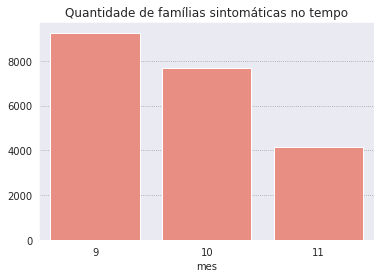

In [58]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.barplot(x=familias_sintomaticas_por_mes.index, y=familias_sintomaticas_por_mes.values, color='salmon')
ax.set(
    title='Quantidade de famílias sintomáticas no tempo',
)


Quantidade de famílias sintomáticas com empréstimo

In [41]:
familias_sintomaticas_com_emprestimos = familias_sintomaticas.possui_emprestimo == 1
familias_sintomaticas_com_emprestimos.value_counts(normalize=True)*100

False    89.142586
True     10.857414
Name: possui_emprestimo, dtype: float64